# ***Исследование продаж игр за 2016 год***

**Описание проекта:** По данным интернет-магазина, который продаёт по всему миру компьютерные игры, провести анализ данных. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Цель проекта:** Выявить определяющие успешность игры закономерности. 

**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Ход проекта**  
1. Нам нужно: подготовить данные (замените названия столбцов, преобразать данные в нужные типы, обработать пропуски при необходимости, посчитать суммарные продажи во всех регионах и записать их в отдельный столбец);
2. Провести исследовательский анализ данных;
3. Составить портрет пользователя каждого региона;
4. Проверить гипотезы и пояснить: как мы сформулировали нулевую и альтернативную гипотезы, какой критерий применили для проверки гипотез;
5. Написать общий вывод;

## Импорт библиотеки и знакомство с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info() #изучим данные и посмотрим сколько строк имеют пропуск

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

### Приведем названия столбцов к нижнему регистру

In [4]:
df.columns = df.columns.str.lower() 

In [5]:
df.head() #названия строк приведены к нижнему регистру

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Перобразование типов данных

#### Начнем с года выпуска игр

In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


In [8]:
df['year_of_release'].unique() #на этом столбце годы выпуска игр, меняем на int

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [9]:
df = df.dropna(subset = ['year_of_release'])

In [10]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [11]:
df['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

#### Оценка критиков

In [12]:
df['critic_score'].unique() #оценки критиков целые, поэтому меняем на тип int

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [13]:
df['critic_score'] = df['critic_score'].astype('float')

In [14]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

#### Оценка игроков 

Оценка игроков записан как тип данных object и нужно поменять на float

In [15]:
df['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных так же присутсивует значение tbd и если судить по источникам, так обозначаются игры, что должны выйти в ближайшее время 

In [16]:
len(df[df['user_score'] == 'tbd']['year_of_release'].unique())
     

19

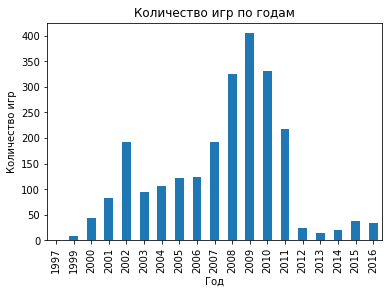

In [17]:
df[df['user_score'] == 'tbd']['year_of_release'].value_counts().sort_index().plot(kind='bar');
plt.title('Количество игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр');

По графику видно, что значение tbd присутствует с 1997 года. Можно сделать вывод что игра так и не вышла. 

In [18]:
def user_score_tbd(user):
    if user == 'tbd':
        return np.nan
    return user

In [19]:
df['user_score'] = df['user_score'].apply(user_score_tbd)

In [20]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [21]:
df['user_score'] = df['user_score'].astype('float')


Заменили значения tdb на значение nan

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Вывод:** в столбцах year_of_release  поменяли типа данных на int, user_score поменяли тип данных на float, а значения fbd yf nan. В столбце critic_score тип на int

### Работа с пропусками 

In [23]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

#### Пропуск в столбце name

В столбце 2 пропуска. Удаляем эти строки

In [24]:
df = df.dropna(subset = ['name'])

In [25]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

**Вывод:** удалили 2 строки с пропусками в столце name, сразу же удалились пропуски в ganre, а пропуски в столбце year_of_release
    мы удалили, когда меняли тип данных. В столбце пропуски решил оставить все как есть, т.к не понятна причина возникновения пропуска

### Cуммарные продажи во всех регионах

In [26]:
df['world_sales'] = df[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [27]:
df.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

In [28]:
df_year = df.groupby('year_of_release')['name'].count()
df_year.head()

year_of_release
1980     9
1981    46
1982    36
1983    17
1984    14
Name: name, dtype: int64

Text(0, 0.5, 'Количество игр')

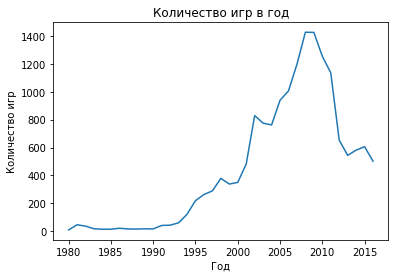

In [29]:
df_year.plot();
plt.title('Количество игр в год');
plt.xlabel('Год')
plt.ylabel('Количество игр')

**Вывод:** Как видим по таблице, количество выпускаемых игр начиная с 1990 года вплоть до 2008-2009г. росла, в 2011 году произошел резкий спад. Для анализа лучше пользоваться интервалом 2014-2016г. 

### Продажи по платформам

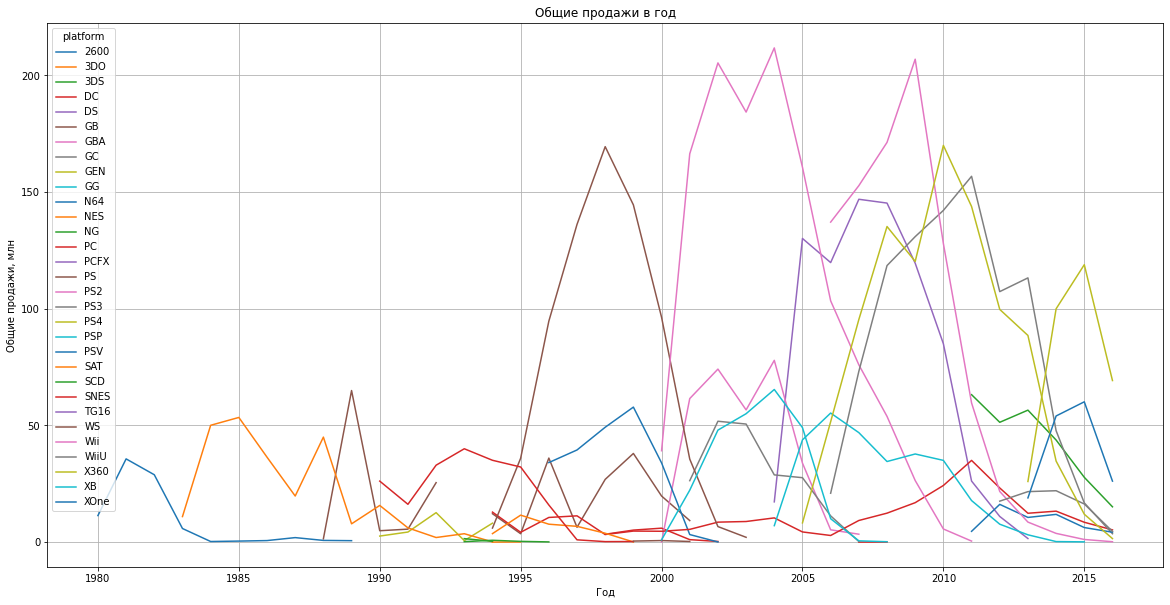

In [30]:
df.pivot_table(index = 'year_of_release', columns = 'platform', values = 'world_sales', aggfunc = 'sum')\
    .plot(figsize=(20,10), grid=True);
plt.title('Общие продажи в год')
plt.ylabel('Общие продажи, млн')
plt.xlabel('Год');

Каждая плотформа набирает свою аудиторию после выхода и за 5-10 лет уходит с рынка 

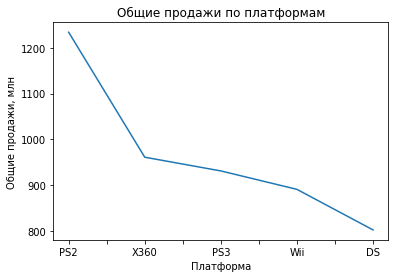

In [31]:
df_top = df.groupby('platform')['world_sales'].sum().sort_values(ascending = False).head(5)
df_top.plot();
plt.title('Общие продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи, млн');

Создадим переменную с актуальными датами

In [32]:
df_aktual = df[(df['year_of_release']>= 2014) & (df['year_of_release']<= 2016) ] # отобрали актуальные годы для анализа
df_platform = df_aktual.pivot_table(index = 'year_of_release', columns = 'platform', values = 'world_sales', aggfunc = 'sum')
df_platform 


platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


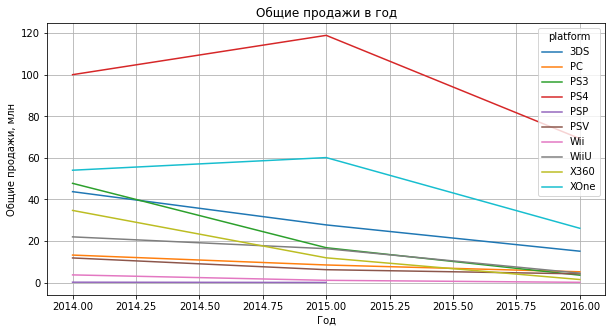

In [33]:
df_platform.plot(figsize=(10,5), grid=True);
plt.title('Общие продажи в год')
plt.ylabel('Общие продажи, млн')
plt.xlabel('Год');

По графику видно что с отрывом лидируют XOne и PS4, а 3DS продали меньше 20млн. Дале будем рассматривать эти 3 платформы  

Расcмотрим отдельно последний год продаж

In [34]:
df_2015 = df_aktual[(df_aktual['year_of_release']>=2015)]
df_plat = df_2015.pivot_table(index = 'year_of_release', columns = 'platform', values = 'world_sales', aggfunc = 'sum')
df_plat

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


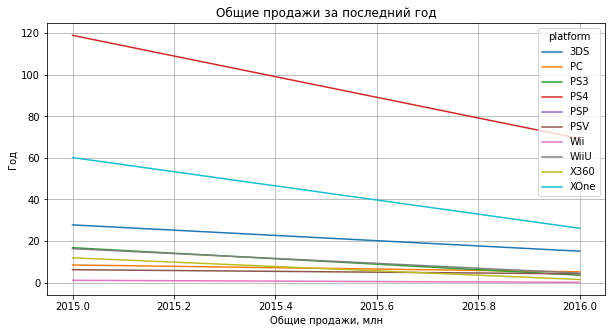

In [35]:
df_plat.plot(figsize=(10,5), grid=True);
plt.title('Общие продажи за последний год')
plt.xlabel('Общие продажи, млн')
plt.ylabel('Год');

Все платформы за последний год потеряли в продажах, больше всего зарабатывают те же 3 платформы 

### Boxplot

Выберем прибыльные платформы 

In [36]:
df_2015.groupby('platform')['world_sales'].sum().sort_values(ascending = False)

platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
PC       13.77
X360     13.48
PSV      10.50
Wii       1.32
PSP       0.12
Name: world_sales, dtype: float64

In [37]:
df_aktual.groupby('platform')['world_sales'].sum().sort_values(ascending = False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: world_sales, dtype: float64

In [38]:
data = df[ 
       df['platform'].isin(['3DS', 'PS4', 'XOne']) & 
       df['year_of_release'].isin([2014, 2015, 2016])
]

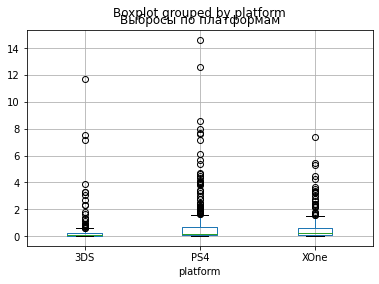

In [39]:
data.boxplot(column='world_sales', by='platform')
plt.title('Выбросы по платформам');

**Вывод:** У платформ 3DS и PS4, есть несколько выбросов, а у XOne выбросы незначительны, это может быть связано с выходом новых игр, поэтому не будем удалять эти данные 

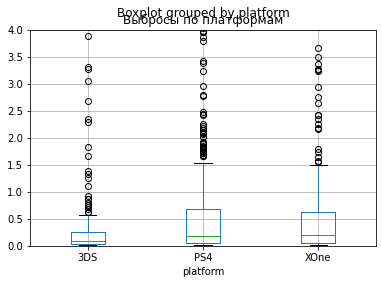

In [40]:
data.boxplot(column='world_sales', by='platform');
plt.ylim(0, 4)
plt.title('Выбросы по платформам');

In [41]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
count,816.000000,816.000000,816.000000,816.000000,816.000000,443.000000,462.000000,816.000000
mean,2015.099265,0.248186,0.235797,0.073015,0.074363,72.367946,6.781602,0.631360
std,0.787135,0.572456,0.616164,0.285267,0.189512,12.358614,1.410523,1.375525
min,2014.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,6.100000,0.050000
50%,2015.000000,0.040000,0.040000,0.000000,0.010000,74.000000,7.000000,0.150000
75%,2016.000000,0.210000,0.182500,0.050000,0.050000,81.000000,7.800000,0.552500
max,2016.000000,6.030000,6.310000,3.180000,2.380000,97.000000,9.200000,14.630000


### Влияние отзывов на продажи 

In [42]:
data['world_sales'].corr(data['user_score'])

-0.030764547505905765

In [43]:
data['world_sales'].corr(data['critic_score'])

0.390003379401458

Если смотреть на общую корреляцию, то оценка игроков и оценка критиков не сильно влияют. Зависимость отзывов от игроков в отрицательную сторону, но незначительно. На мнение критиков игроки больше прислушиваются

#### Корреляция для PS4

In [44]:
data_ps4 = data[data['platform']=='PS4']
data_ps4.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [45]:
data_ps4['world_sales'].corr(data_ps4['critic_score'])

0.40266141068104083

In [46]:
data_ps4['world_sales'].corr(data_ps4['user_score'])

-0.040131589472697356

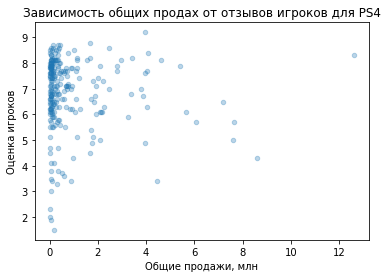

In [47]:
data_ps4.plot(x='world_sales', y='user_score', kind='scatter', alpha=0.3)
plt.title('Зависимость общих продах от отзывов игроков для PS4')
plt.xlabel('Общие продажи, млн')
plt.ylabel('Оценка игроков');

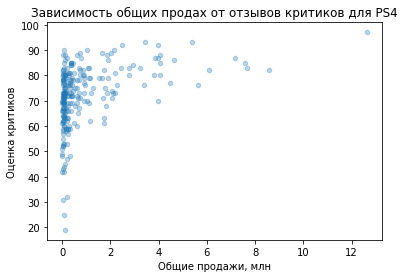

In [48]:
data_ps4.plot(x='world_sales', y='critic_score', kind='scatter', alpha=0.3)
plt.title('Зависимость общих продах от отзывов критиков для PS4')
plt.xlabel('Общие продажи, млн')
plt.ylabel('Оценка критиков');

На отзывы критиков доверяют, но корреляция не такая большая, всего 0.4 и -0.04 соответсвенно.

#### Корреляция XOne

In [49]:
data_xone = data[data['platform']=='XOne']
data_xone.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47


In [50]:
data_xone['world_sales'].corr(data_xone['user_score'])

-0.0703839280647581

In [51]:
data_xone['world_sales'].corr(data_xone['critic_score'])

0.42867694370333226

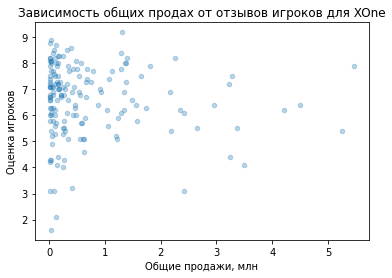

In [52]:
data_xone.plot(x='world_sales', y='user_score', kind='scatter', alpha=0.3)
plt.title('Зависимость общих продах от отзывов игроков для XOne')
plt.xlabel('Общие продажи, млн')
plt.ylabel('Оценка игроков');

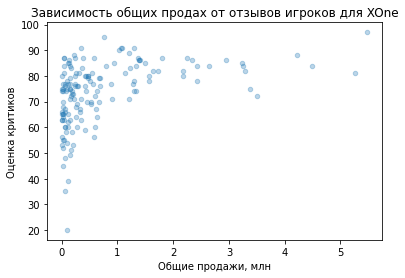

In [53]:
data_xone.plot(x='world_sales', y='critic_score', kind='scatter', alpha=0.3)
plt.title('Зависимость общих продах от отзывов игроков для XOne')
plt.xlabel('Общие продажи, млн')
plt.ylabel('Оценка критиков');

В платформе XOne зависимость оценки критиков на продажи 0.43, можно сделать вывод что зависимость имеется, хоть и незначительная. Зависимость между оценками игроков и продажами отрицательная, но чуть меньше 0

#### Корреляция 3DS

In [54]:
data_3ds = data[data['platform']=='3DS']
data_3ds.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55


In [55]:
data_3ds['world_sales'].corr(data['user_score'])

0.2151932718527028

In [56]:
data_3ds['world_sales'].corr(data['critic_score'])

0.31411749286905105

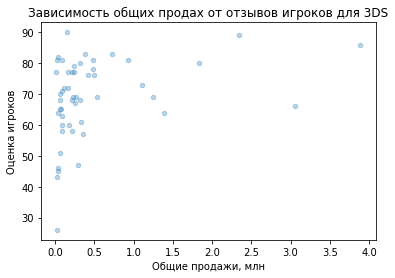

In [57]:
data_3ds.plot(x='world_sales', y='critic_score', kind='scatter', alpha=0.3)
plt.title('Зависимость общих продах от отзывов игроков для 3DS')
plt.xlabel('Общие продажи, млн')
plt.ylabel('Оценка игроков');

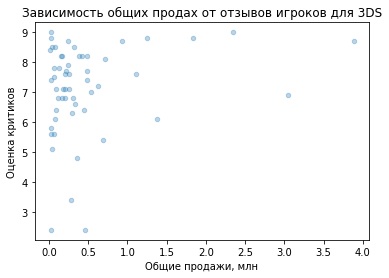

In [58]:
data_3ds.plot(x='world_sales', y='user_score', kind='scatter', alpha=0.3)
plt.title('Зависимость общих продах от отзывов игроков для 3DS')
plt.xlabel('Общие продажи, млн')
plt.ylabel('Оценка критиков');

В платформе 3DS зависимость между отзывами и продажами уже больше. К мнемению критиков так же больше прислушиваются, но и на мнение игроков юбращают внимание 

**Вывод:** В платформах PS4 и XOne есть  зависимость между отзывами критиков и продажами, а корреляция доходит до 0.4. В платформе 3DS зависимость положительная и прислушиваются на мнение игроков

#### Общее распределение игр по жанрам

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [59]:
data.groupby('genre')['world_sales'].median().sort_values(ascending = False) #сгруппируем данные по жанрам 

genre
Shooter         0.820
Sports          0.330
Role-Playing    0.200
Racing          0.175
Fighting        0.160
Platform        0.160
Simulation      0.120
Action          0.115
Misc            0.115
Adventure       0.070
Puzzle          0.065
Strategy        0.060
Name: world_sales, dtype: float64

In [60]:
data.groupby('genre')['world_sales'].sum().sort_values(ascending = False)

genre
Action          144.74
Shooter         133.85
Role-Playing     79.56
Sports           75.01
Misc             18.36
Fighting         18.00
Racing           17.05
Adventure        10.59
Platform         10.02
Simulation        5.69
Strategy          1.43
Puzzle            0.89
Name: world_sales, dtype: float64

**Вывод:** Самая прибыльные жанры Shooter. В сумме они продаются на 280млн и это больше половины общей суммы. Самые непопулярные жанры Strategy и Puzzle (у них продаж всего на 2млн в сумме)                   

## Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
    Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    Самые популярные жанры (топ-5). Поясните разницу.
    Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### NA

In [61]:
data.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5) #группируем данные по региону NA в общей таблице 

platform
PS4     98.61
XOne    81.27
3DS     22.64
Name: na_sales, dtype: float64

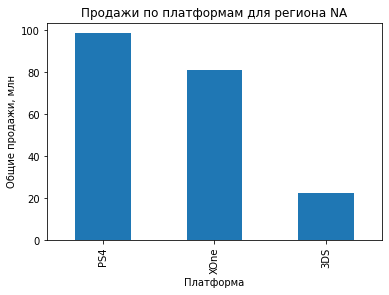

In [62]:
data_na = data.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5)
data_na.plot(x='platform', y='na_sales', kind='bar')
plt.title('Продажи по платформам для региона NA')
plt.ylabel('Общие продажи, млн')
plt.xlabel('Платформа');

Для региона NA самая популярная платформа PS4, далее идет XOne

In [63]:
(data['na_sales'].sum())/(data['world_sales'].sum()) #доля продаж региона NA во всем мире

0.3930976921135891

Продажа в регионе NA забирает, почти 40% от всех продаж 

In [64]:
(data_ps4['na_sales'].sum())/(data['world_sales'].sum()) #доля продаж платформы PS4 во всем мире 

0.19140511267687646

In [65]:
(data_xone['na_sales'].sum())/(data['world_sales'].sum()) #доля продаж платформы XOne во всем мире

0.15774762708903511

In [66]:
(data_3ds['na_sales'].sum())/(data['world_sales'].sum()) #доля продаж платформы 3DS во всем мире

0.04394495234767755

**Вывод:** Самые популярные платформы XOne и PS4 забирают 40% прибыли с общий продаж

#### Популярные жанры для NA

In [67]:
data.groupby('genre')['na_sales'].median().sort_values(ascending=False).head(5)

genre
Shooter         0.375
Sports          0.120
Platform        0.090
Fighting        0.070
Role-Playing    0.050
Name: na_sales, dtype: float64

Для региона самый популярный жанр Shooter и Sports 

#### Влияние рейтинга

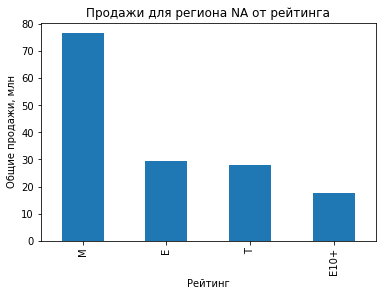

In [68]:
data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar');
plt.title('Продажи для региона NA от рейтинга')
plt.ylabel('Общие продажи, млн')
plt.xlabel('Рейтинг');

В регионе северная америка больше всего игр продается категории "М"

### EU

In [69]:
data.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5) #группируем данные по региону EU

platform
PS4     130.04
XOne     46.25
3DS      16.12
Name: eu_sales, dtype: float64

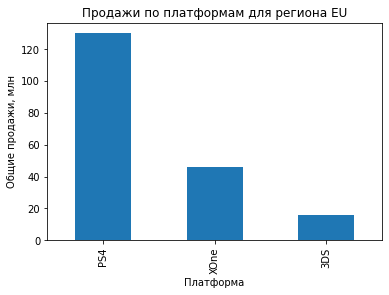

In [70]:
data_eu = data.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5)
data_eu.plot(x='platform', y='eu_sales', kind='bar')
plt.title('Продажи по платформам для региона EU')
plt.ylabel('Общие продажи, млн')
plt.xlabel('Платформа');

Для региона EU самая популярная платформа PS4 и зарабатывают они 130млн

In [71]:
(data['eu_sales'].sum())/(data['world_sales'].sum()) #доля продаж региона EU во всем мире

0.3734738640113356

В регионе EU крутится 37,4% всех денег, что на 2% ниже чем в NA

In [72]:
(data_ps4['eu_sales'].sum())/(data['world_sales'].sum()) #доля продаж платформы PS4 во всем мире 

0.2524117315941691

In [73]:
(data_xone['eu_sales'].sum())/(data['world_sales'].sum()) #доля продаж платформы XOne во всем мире

0.08977270521555153

In [74]:
(data_3ds['eu_sales'].sum())/(data['world_sales'].sum()) #доля продаж платформы 3DS во всем мире

0.03128942720161493

В Европе не очень популярны 2 платформы, это XOne и 3DS, у них в сумме чуть больше 1%. PS4 забирает 1/4 всех денег себе

####  Популярные жанры для EU

In [75]:
data.groupby('genre')['eu_sales'].median().sort_values(ascending=False).head(5)

genre
Shooter     0.310
Racing      0.105
Sports      0.080
Platform    0.060
Action      0.030
Name: eu_sales, dtype: float64

В Европе популярный жанр: Shooter, ситуация примерно такая же как и в NA

#### Влияние рейтинга

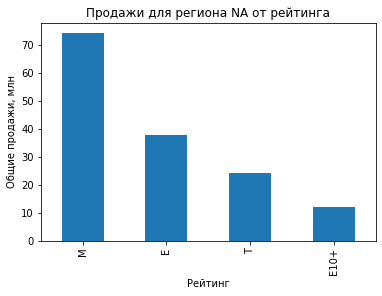

In [76]:
data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Продажи для региона NA от рейтинга')
plt.ylabel('Общие продажи, млн')
plt.xlabel('Рейтинг');

Так же как и в NA, популярна категория М

### JP

In [77]:
data.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5) #группируем данные по региону JP

platform
3DS     44.24
PS4     15.02
XOne     0.32
Name: jp_sales, dtype: float64

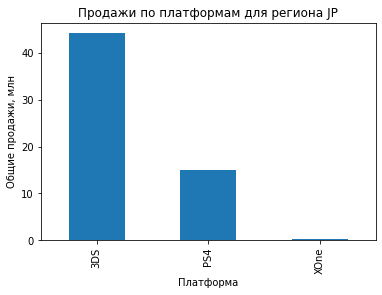

In [78]:
data_jp = data.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5)
data_jp.plot(x='platform', y='jp_sales', kind='bar')
plt.title('Продажи по платформам для региона JP')
plt.ylabel('Общие продажи, млн')
plt.xlabel('Платформа');

В Японии преобладает платформа 3DS, а у XOne практически нет продаж

In [79]:
(data['jp_sales'].sum())/(data['world_sales'].sum()) #доля продаж региона JP во всем мире

0.11564665463227157

Регион JP, продает игры всего на 11,5% от всего оборота в мире 

In [80]:
(data_ps4['jp_sales'].sum())/(data['world_sales'].sum()) #доля продаж платформы PS4 во всем мире 

0.0291542925910829

In [81]:
(data_xone['jp_sales'].sum())/(data['world_sales'].sum()) #доля продаж платформы XOne во всем мире

0.0006211300685184107

In [82]:
(data_3ds['jp_sales'].sum())/(data['world_sales'].sum()) #доля продаж платформы 3DS во всем мире

0.08587123197267026

Больше всего доли продажи у 3DS, а у PS4 продаж в 3 раза меньше. На долю XOne в региона JP  приходится всего 0,06% 

####  Популярные жанры для JP

In [83]:
data.groupby('genre')['jp_sales'].median().sort_values(ascending=False).head(5)

genre
Role-Playing    0.055
Fighting        0.030
Puzzle          0.030
Strategy        0.020
Simulation      0.010
Name: jp_sales, dtype: float64

Самые популярный жанр: Role-Playing 

#### Влияние рейтинга

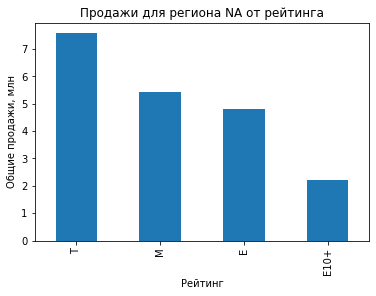

In [84]:
data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Продажи для региона NA от рейтинга')
plt.ylabel('Общие продажи, млн')
plt.xlabel('Рейтинг');

В Японии популярен рейтинг Т (от 13 лет), остальное как и во всем мире

**Вывод:** Больше всего продаж в 2 регионах: NA и EU (суммарно 88%). в этих регионах самые популярный жанр Shooter, а категория М (от 16 лет). Этот жанр как раз подходят под эту категорию. В Японии ситуация иная: особой популярностью пользуется платформа 3DS, жанр Role-Playing, категория Т(от 13 лет), что можно связать другой культурой страны 

## Проверка гипотез

### Гипотеза 1

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H0: средние пользовательские рейтинги равны;
Н1: средние пользовательские рейтинги разные.

В связи с тем, что платформа PC не попала в нашу выборку, будем работать с первичным датафреймом, но с актуальными датами. Ранее уже сохраняли датафрейм df_aktual

In [85]:
df_aktual = df_aktual[df_aktual['user_score']>=0.001]

In [86]:
df_one = df_aktual[df_aktual['platform']=='XOne'] #получаем новый датафрейм по XOne
one = df_one['user_score'] #получаем рейтинги игроков

In [87]:
df_pc = df_aktual[df_aktual['platform']=='PC'] #получаем новый датафрейм по PC
pc = df_pc['user_score']#получаем рейтинги игроков по платформе pc

In [88]:
alpha = .05 # задаем значение alpha, если pvalue окажется меньше, то отвергнем гипотезу
res = st.ttest_ind(one,pc)
print('p-значение:', res.pvalue)
if (res.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Средние пользовательские рейтинги платформ Xbox One и PC равны

### Гипотеза 2

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Н0: средние пользовательсике рейтинги жанров Action и Sports разные; 
Н1: средние пользовательсике рейтинги жанров равные.

Работаем с датафреймом data

In [89]:
data = data[data['user_score']>=0.001]

In [90]:
action = data[data['genre']=='Action']
action_user = action['user_score']

In [91]:
sports = data[data['genre']=='Sports']
sports_user = sports['user_score']

In [92]:
alpha = .05
results = st.ttest_ind(action_user, sports_user)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.0424295659220704e-07
Отвергаем нулевую гипотезу


**Вывод:** Средние пользовательские рейтинги жанров Action и Sports разные, гипотеза верная 

## Вывод

Нам в этом проекте нужно было: подготовить данные, провести исследовательский анализ данных, составить портрет пользователя каждого региона, проверить гипотезы.
По ходу проекта, мы в столбцах year_of_release  поменяли типа данных на int, user_score поменяли тип данных на float, а значения fbd на nan . 
Увидели, что количество выпускаемых игр начиная с 1990 года вплоть до 2008-2009г. росла, в 2011 году произошел резкий спад. В платформах PS4 и XOne есть небольшая зависимость между отзывами и продажами, в XOne и PS4 корреляция доходит до 0.4. В платформе 3DS зависимость есть от user_score и от critik_score. Решили что, для анализа лучше пользоваться интервалом 2014-2016г.

Выяснили, что зависимость м/у отзывами игроков и продажами -0.030764547505905765, а м/у отзывами критиков и продажами 0.390003379401458. Если смотреть на общую корреляцию, то оценка игроков и оценка критиков не сильно влияют. Зависимость отзывов от игроков в отрицательную сторону, но незначительно. На мнение критиков игроки больше прислушиваются

Самая прибыльная жанр Shooter. Самые непопулярные жанры Strategy и Puzzle (у них продаж всего на 2млн в сумме)

Больше всего продаж в 2 регионах: NA и EU (суммарно 88%). В этих регионах самые популярный жанр Shooter, а категория М (от 16 лет). Эти жанр как раз подходит под эту категорию. В Японии ситуация иная: особой популярностью пользуется платформа 3DS, жанр Role-Playing, категория Т(от 13 лет), что можно связать другой культурой страны